In [1]:
import mixed_stream
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

ModuleNotFoundError: No module named 'matplotlib'

In [2]:
linestyle_tuple = cycle([
'solid',
(0, (1, 1)),
(0, (1, 1)),

(0, (5, 10)),
(0, (5, 5)),
(0, (5, 1)),

(0, (3, 10, 1, 10)),
(0, (3, 5, 1, 5)),
(0, (3, 1, 1, 1)),

(0, (3, 5, 1, 5, 1, 5)),
(0, (3, 10, 1, 10, 1, 10)),
(0, (3, 1, 1, 1, 1, 1))])

color = cycle(['r', 'g', 'b', 'k'])

marker = cycle(['','.','o', '^', 's'])

labels = ['S [kg/(h.kN)]', 'F/m_dot[N.s/kg]', 'alpha']
title = 'Pi_c'

x_axis = [i for i in range(10,41,2)]
M_0s = [0.9,2]
pi_fs = [2,3,4,5]


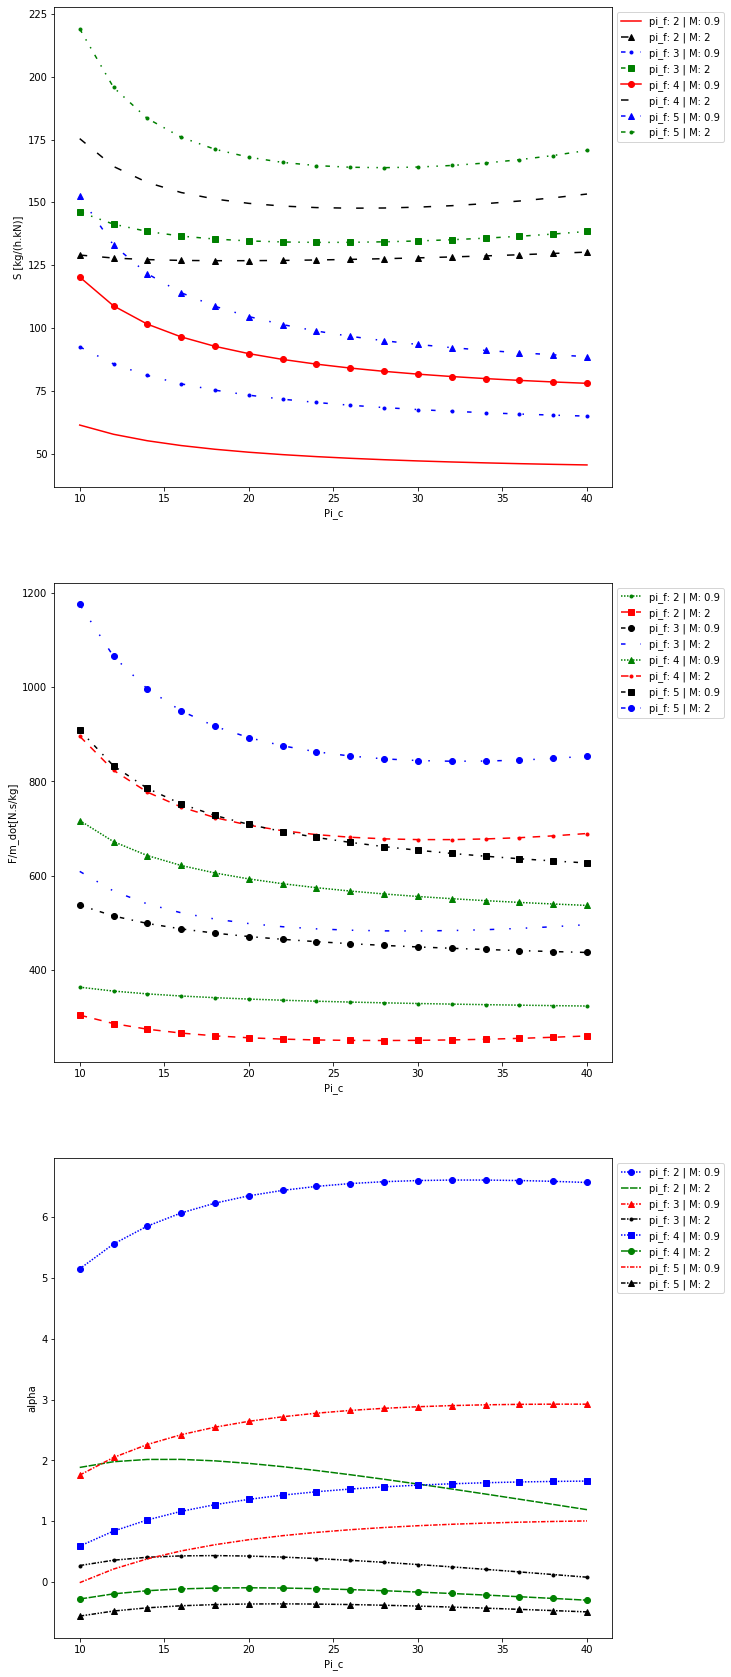

In [3]:
%matplotlib inline

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10,30))


for pi_f in pi_fs:
    for M in M_0s:
        S = []
        ISP = []
        ALPHA = []
        for pi_c in x_axis:
            isp, s, alpha = mixed_stream.calculate(pi_c, pi_f, M, False)
            ISP.append(isp)
            S.append(s * 1000 * 3600)
            ALPHA.append(alpha)
        
        # CONSUMO ESPECÍFICO X PI_C
        axs[0].plot(x_axis, S, linestyle=next(linestyle_tuple), color=next(color), marker=next(marker), label='pi_f: {0} | M: {1}'.format(pi_f, M))
        axs[1].plot(x_axis, ISP, linestyle=next(linestyle_tuple), color=next(color), marker=next(marker), label='pi_f: {0} | M: {1}'.format(pi_f, M))
        axs[2].plot(x_axis, ALPHA, linestyle=next(linestyle_tuple), color=next(color), marker=next(marker), label='pi_f: {0} | M: {1}'.format(pi_f, M))

for i in range(3):
    axs[i].set_ylabel(labels[i])
    axs[i].set_xlabel(title)
    axs[i].legend(loc="upper left", bbox_to_anchor=(1,1))


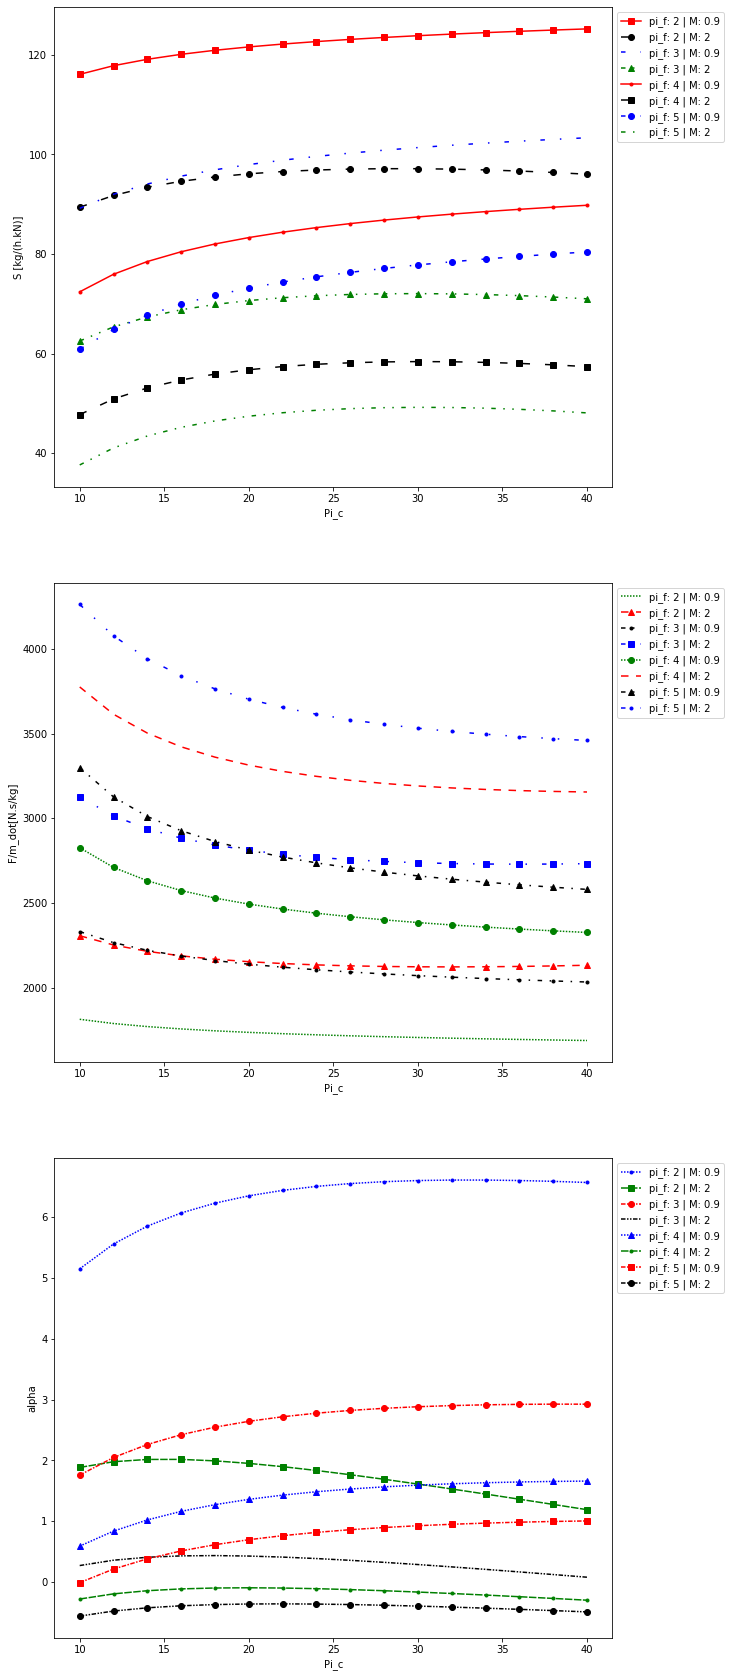

In [4]:
fig2, axs2 = plt.subplots(nrows=3, ncols=1, figsize=(10,30))

for pi_f in pi_fs:
    for M in M_0s:
        S = []
        ISP = []
        ALPHA = []
        for pi_c in x_axis:
            isp, s, alpha = mixed_stream.calculate(pi_c, pi_f, M, True)
            ISP.append(isp)
            S.append(s * 1000 * 3600)
            ALPHA.append(alpha)
        
        # CONSUMO ESPECÍFICO X PI_C
        axs2[0].plot(x_axis, S, linestyle=next(linestyle_tuple), color=next(color), marker=next(marker), label='pi_f: {0} | M: {1}'.format(pi_f, M))
        axs2[1].plot(x_axis, ISP, linestyle=next(linestyle_tuple), color=next(color), marker=next(marker), label='pi_f: {0} | M: {1}'.format(pi_f, M))
        axs2[2].plot(x_axis, ALPHA, linestyle=next(linestyle_tuple), color=next(color), marker=next(marker), label='pi_f: {0} | M: {1}'.format(pi_f, M))

for i in range(3):
    axs2[i].set_ylabel(labels[i])
    axs2[i].set_xlabel(title)
    axs2[i].legend(loc="upper left", bbox_to_anchor=(1,1))

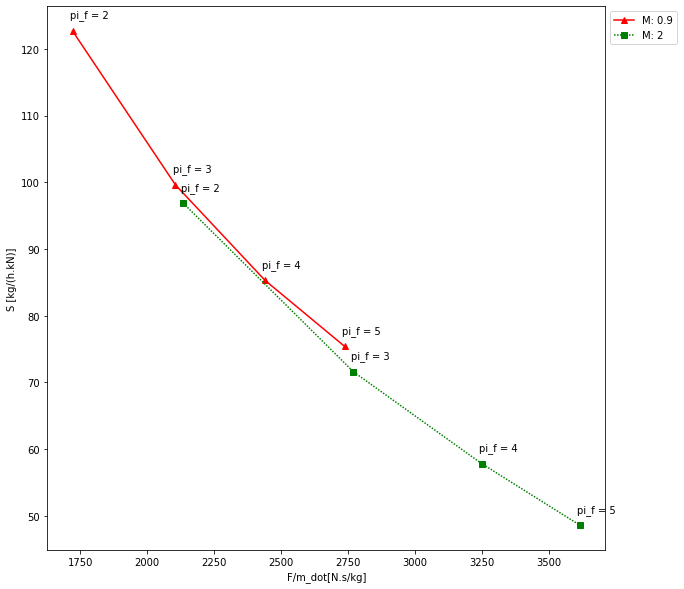

In [5]:
fig3, axs3 = plt.subplots(nrows=1, ncols=1, figsize=(10,10))

for M in M_0s:
    S = []
    ISP = []
    ALPHA = []
    for pi_f in pi_fs:
        isp, s, alpha = mixed_stream.calculate(24, pi_f , M, True)
        ISP.append(isp)
        S.append(s * 1000 * 3600)
        ALPHA.append(alpha)

    axs3.plot(ISP, S, linestyle=next(linestyle_tuple), color=next(color), marker=next(marker), label='M: {0}'.format(M))
    
    for i,txt in enumerate(pi_fs):
        axs3.annotate("pi_f = {}".format(txt),(ISP[i]-10, S[i]+2))


axs3.set_ylabel(labels[0])
axs3.set_xlabel(labels[1])
axs3.legend(loc="upper left", bbox_to_anchor=(1,1))

